<img  src=http://repository.icesi.edu.co/biblioteca_digital/image/icesi-logo.svg height="250" width="250">

**Author: Javier Díaz, Christian Urcuqui**
        

# Programación tradicional vs. aprendizaje automático

Imagínen que ustedes trabajan en el correo, y quieren automatizar el despacho de los paquetes y cartas.

Ya disponen de un software que logra capturar las direcciones y separarlas caracter por caracter en imágenes de 8 píxeles x 8 píxeles en escala de grises, tales que 0 es el negro absoluto, y entre mayor el valor más claro el pixel.

Ese software además puede inferir, según el lugar de los caracteres en la dirección, si cada caracter es una letra o un dígito, pero su labor se termina ahí. 

<img src="http://rasbt.github.io/mlxtend/user_guide/data/mnist_data_files/mnist_data_10_0.png" />

## Programación tradicional
Ustedes ahora tienen que pensar en 2 programas diferentes: uno que pueda identificar las clases de las imágenes de dígitos (0 a 9) y otro que pueda clasificar los caracteres letra (a-z,A-Z).

Centrémonos en el primer problema de clasificación de imágenes de dígitos.

Consideren que el dataset con las imágenes a tratar ya está disponible en una librería que produce el primer software:

In [ ]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [ ]:
digits = load_digits()
type(digits)

In [ ]:
?sklearn.utils.Bunch

In [ ]:
digits.keys()

In [ ]:
#for i in range(0,5):
print(digits.images[1])

In [ ]:
print(digits.images[1][:,4])

Se tienen en total: 1797 imágenes
[[ 0.  0. 12.  8.  8.  7.  0.  0.]
 [ 0.  3. 16. 16. 11.  7.  0.  0.]
 [ 0.  2. 14.  1.  0.  0.  0.  0.]
 [ 0.  5. 14.  5.  0.  0.  0.  0.]
 [ 0.  2. 15. 16.  9.  0.  0.  0.]
 [ 0.  0.  0.  2. 16.  2.  0.  0.]
 [ 0.  0.  4.  8. 16.  4.  0.  0.]
 [ 0.  0. 11. 14.  9.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

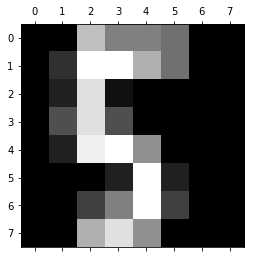

In [8]:
digits = load_digits()
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[25]) # Imprimir una imagen dada
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
print("Se tienen en total:", numImagenes, "imágenes")
print(digits.images[25]) # Ver su representación en pixeles

In [ ]:
type(digits)

In [ ]:
?sklearn.utils.Bunch

In [ ]:
digits['images'][8]

Después de un proceso de etiquetado manual de varios días, realizado por un estudiante de pregrado en ingeniería de sistemas, en el que manualmente se clasificaron las imágenes una a una, se pudo obtener un *ground truth* con las clases reales de cada imagen.

Las etiquetas de las imágenes que indican el dígito real se encuentran disponibles:

In [ ]:
y = digits.target # el método nos provee las etiquetas de las imágenes en un arreglo
print(y[25])

Para poder simplificar la representación de los datos, se pueden aplanar las matrices de pixeles para poner cada imagen en un solo array de 64 pixeles:

In [ ]:
X = digits.images.reshape((numImagenes, -1)) # se reducen las dimensiones
print(X[25])

**Traten de pensar en un programa tradicional que les permita clasificar cualquier imágen de números en el dígito correspondiente.**

...

...

## Aprendizaje automático

Con un modelo de **machine learning** se puede realizar esta tarea de una manera bastante sencilla.

In [ ]:
#from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
import pylab as plt

gnb = GaussianNB()
fit = gnb.fit(X, y)

Se pueden evaluar las clases estimadas por el modelo vs. las clases reales

In [ ]:
y_estimado = fit.predict(X)
print("Reales   :", y[0:25])
print("Estimados:", y_estimado[0:25])

Podemos tener una idea más clara de los casos en los que se equivoca el modelo:

In [ ]:
images_and_predictions = list(zip(digits.images, y_estimado))
for index, (image, prediction) in enumerate(images_and_predictions[:15]):
    plt.subplot(3,5, index+1) #se crean los placeholders de 3x5 filasXcolumnas
    plt.axis('off')  #se quitan los ejes
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Pred: %i' % prediction)
plt.show()

Nos gustaría tener una idea de la correctitud global del modelo aprendido.

In [ ]:
metrics.accuracy_score(y, y_estimado)

## Tarea 

Previamente hemos podido utilizar las herramientas de sklearn para cargar las imágenes del dataset notMNIST, a través de pylab visualizamos una muestra y finalmente utilizamos un primer algoritmo de machine learning (Naive Bayes) para el entrenamiento y la predicción de un conjunto de imágenes.

Su trabajo es aplicar un método de programación tradicional, es decir, sin usar modelos basados en machine learning. El método debe estar en la capacidad de identificar la etiqueta (el número asignado a la imagen) del conjunto de NotMNIST.

Cada pareja de estudiantes se debe encargar de predecir 2 dígitos, específicamente, cada grupo debe seleccionar entre las siguientes opciones de dígitos:

+ 1 y 5
+ 8 y 2
+ 9 y 7
+ 0 y 3
+ 4 y 6

Cada dígito implica la creación de un modelo de clasificación para disitinguir si el dígito está o no en la imagen.
Una vez implementados los modelos, para cada modelo, calcule:
+ El accuracy y kappa global de cada clasificador
+ El precision, recall, especificidad y F-Measure de cada clase


## Desarrollo Tarea

Se implementaron 2 modulos en python, llamados main.py y shapes.py, en esta ultima una pequeña clase llamada Shape



In [ ]:
import copy
import math
class Shape:
    MAXVALUE = 40

    def __init__(self,matrix):
        self.__shape=matrix
        self.__sumValues=0
        for row in matrix:
            for column in row:
                self.__sumValues+=column
            

    def preProcessing(self, matri):
        max = -1
        matrix=copy.deepcopy(matri)
        for row in matrix:
            for column in row:
                if column > max:
                    max = column
        increment = (Shape.MAXVALUE-max)/max
        increment += 1
        
        for row in matrix:
            for  i in range(0,len(row)):
                row[i] *= increment
                row[i]=int(row[i])
        return matrix
    

    def calculateLikeness(self,matrix):
        matrixSubst=0
        for row in range(0,len(matrix)):
            for column in range(len(matrix[0])):
                matrixSubst+=math.fabs(matrix[row][column]-self.__shape[row][column])
        tmp= matrixSubst/self.__sumValues
        return 1-tmp
    
    def __str__(self):
        return str(self.__shape)
            
        
"""def test():
    matrix=[
        [10,10,10],
        [1,10,1],
        [1,10,1]
    ]
    matrix1=[
        [9,3,8],
        [5,6,1],
        [1,6,2]
    ]
    shape=Shape(matrix)
    var=shape.preProcessing(matrix1)
    result=shape.calculateLikeness(var)
    print(result)

test()"""


In [10]:
import pathlib
from sklearn.datasets import load_digits
import pylab as pl
import sklearn



print(__name__)

array_evaluated_key = "array_evaluted"
successful_key= "successful"
total_evaluated_key = "total_evaluated"

digits = load_digits()
targets = digits.target

def load_number_file(number):
    if number == 4:
        return [[0.0,  0.0,  0.0, 40.0, 50.0,  0.0,  0.0,  0.0],
                [0.0,  0.0,  0.0, 50.0, 50.0,  0.0,  0.0,  0.0],
                [0.0,  0.0, 35.0, 40.0, 50.0,  1.0, 15.0,  0.0],
                [0.0,  0.0, 35.0, 40.0, 50.0, 15.0, 25.0,  0.0],
                [0.0, 20.0, 40.0,  0.0, 50.0, 25.0, 15.0,  0.0],
                [0.0, 10.0, 35.0, 40.0, 10.0, 30.0, 25.0,  0.0],
                [0.0,  0.0,  0.0, 40.0, 40.0, 35.0,  0.0,  0.0],
                [0.0,  0.0,  0.0, 40.0, 40.0, 35.0,  0.0,  0.0]];
    else:
        return [[0.0, 35.0, 45.0, 45.0, 45.0, 50.0,  0.0,  0.0],
                [0.0,  0.0, 35.0, 50.0, 45.0, 50.0,  0.0,  0.0],
                [0.0,  0.0,  0.0, 45.0, 50.0, 35.0,  0.0,  0.0],
                [0.0,  0.0,  0.0, 40.0, 35.0,  0.0,  0.0,  0.0],
                [0.0, 25.0, 30.0, 35.0, 30.0, 25.0,  0.0,  0.0],
                [0.0,  0.0, 40.0, 35.0,  0.0,  0.0,  0.0,  0.0],
                [0.0,  0.0, 40.0,  0.0,  0.0,  0.0,  0.0,  0.0],
                [0.0, 40.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0]];
        
    

def list_filter(number1,targets):
    indices_list =[]
    for i in range(0,len(targets)):
        if targets[i]==number1:
            indices_list.append(i)
    return indices_list

#Corremos el test de un número
def run_test(number:int):

    """Cargamos las matrices a comparar"""
    matrix = load_number_file(number)

    """Cargamos y filtramos los indices de las imagenes donde estan los digitos"""
    
    indices_list = list_filter(number,targets)

    """Creamos los shapes"""
    shape= Shape(matrix)

    total_evaluated = len(indices_list)
    successful = 0

    array_evaluated_indices = []

    """Preparamos cada uno de los targets con el preprocesamiento"""
    for i in indices_list:
        
        preprocessed_matrix = shape.preProcessing(digits.images[i])
        result = shape.calculateLikeness(preprocessed_matrix) #Result es la probabilidad de que sea el número.
        #print("%s in %s where target was %s"% (result,i,targets[i]))
        if result >= 0.4:
            array_evaluated_indices.append(i)
            successful+=1
     
    return {
        array_evaluated_key:array_evaluated_indices,
        successful_key:successful,
        total_evaluated_key:total_evaluated
    }


result = run_test(4)
total_evaluated = result[total_evaluated_key]
successful = result[successful_key]
array_evaluated = result[array_evaluated_key]
rate = successful / total_evaluated


print("Test - 4 --> Rate of success was %s, with %s successful and %s evaluated " % (rate,successful,total_evaluated) )

result = run_test(7)
total_evaluated = result[total_evaluated_key]
successful = result[successful_key]
array_evaluated = result[array_evaluated_key]
rate = successful / total_evaluated


print("Test - 7 --> Rate of success was %s, with %s successful and %s evaluated " % (rate,successful,total_evaluated) )


__main__
Test - 4 --> Rate of success was 0.6795580110497238, with 123 successful and 181 evaluated 
Test - 7 --> Rate of success was 0.0335195530726257, with 6 successful and 179 evaluated 
